# Train Market Price Model

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [2]:
raw_df = pd.read_parquet('./dataset_prep/raw_df.parquet')

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000000 entries, 0 to 49999999
Data columns (total 26 columns):
 #   Column        Dtype
---  ------        -----
 0   feature_0     int64
 1   feature_1     int64
 2   feature_2     int64
 3   feature_3     int64
 4   feature_4     int64
 5   feature_5     int64
 6   feature_6     int64
 7   feature_7     int64
 8   feature_8     int64
 9   feature_9     int64
 10  feature_10    int64
 11  feature_11    int64
 12  feature_12    int64
 13  feature_13    int64
 14  feature_14    int64
 15  feature_15    int64
 16  feature_16    int64
 17  feature_17    int64
 18  feature_18    int64
 19  feature_19    int64
 20  feature_20    int64
 21  feature_21    int64
 22  feature_22    int64
 23  feature_23    int64
 24  click         int8 
 25  market_price  int16
dtypes: int16(1), int64(24), int8(1)
memory usage: 9.1 GB


In [5]:
y = raw_df['market_price']
X = raw_df.drop(columns=['click', 'market_price'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
categorical_features = X_train.columns.values.tolist()
predictors = categorical_features

In [8]:
def fit(X_train, y_train, X_test, y_test, categorical_features, predictors, verbose=True):
    params = {
        'boosting_type': 'gbdt',
        'class_weight': None,
        'objective': 'regression',
        'learning_rate': 0.1,
        'n_estimators': 400,
        'max_leaves': 255,
        'max_depth': 8,
        'min_data_in_leaf': 100,
        'max_bin': 250, # max number of bins that feature values will be bucketed in
        'subsample_freq': 1, # frequency for bagging
        'bagging_fraction': 0.75,
        'colsample_bytree': 0.75,
        'cat_smooth': 20,
        'min_child_weight': 0,
        'min_split_gain': 0,
        'reg_alpha': 0.02,
        'reg_lambda': 0.02,
        'n_jobs': -1
    }

    clf = lgb.LGBMRegressor(**params)    
    clf.fit(
        X_train,
        y_train,
        categorical_feature=categorical_features,
        feature_name=predictors,
        #sample_weight=calc_weight(X_train.index),
        eval_set=[(X_test, y_test)],
        #eval_metric='mae',
        early_stopping_rounds=20,
        verbose=verbose
    )
    return clf

In [9]:
clf = fit(X_train, y_train, X_test, y_test, categorical_features, predictors)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['feature_0', 'feature_1', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_2', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[LightGBM] [Warning] num_leaves is set=31, max_leaves=255 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's l1: 94.022	valid_0's l2: 22839.1
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 90.3771	valid_0's l2: 20190.2
[3]	valid_0's l1: 86.8633	valid_0's l2: 17914.7
[4]	valid_0's l1: 83.748	valid_0's l2: 16061.1
[5]	valid_0's l1: 81.0155	valid_0's l2: 14572.9
[6]	valid_0's l1: 78.5095	valid_0's l2: 13349.9
[7]	valid_0's l1: 76.0841	valid_0's l2: 12287.5
[8]	valid_0's l1: 73.9221	valid_0's l2: 11416.1
[9]	valid_0's l1: 72.0477	valid_0's l2: 10720.2
[10]	valid_0's l1: 70.2396	valid_0's l2: 10120.3
[11]	valid_0's l1: 68.599	valid_0's l2: 9625.36
[12]	valid_0's l1: 67.1917	valid_0's l2: 9225.56
[13]	valid_0's l1: 65.7709	valid_0's l2: 8872.12
[14]	valid_0's l1: 64.581	valid_0's l2: 8576.56
[15]	valid_0's l1: 63.4148	valid_0's l2: 8318.84
[16]	valid_0's l1: 62.4752	valid_0's l2: 8114.1
[17]	valid_0's l1: 61.6176	valid_0's l2: 7941.83
[18]	valid_0's l1: 60.8196	valid_0's l2: 7787.5
[19]	valid_0's l1: 60.1324	valid_0's l2: 7654.83
[20]	valid_0's l1: 59.

<AxesSubplot:title={'center':'Feature importance gain'}, xlabel='Feature importance', ylabel='Features'>

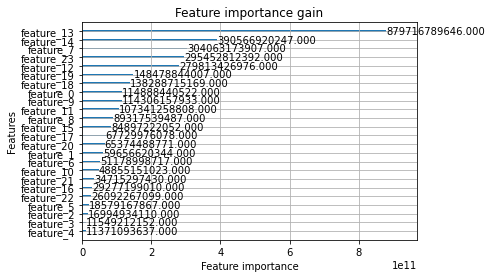

In [10]:
lgb.plot_importance(clf, importance_type='gain', title='Feature importance gain')

In [11]:
np.mean(y)

99.0541614

In [12]:
np.mean(y_train)

99.050061825

In [13]:
np.mean(y_test)

99.0705597

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
mean_absolute_error(y, np.ones(len(y))*np.median(y))

77.72433464

In [16]:
raw_df.groupby('feature_13')['market_price'].agg([
    'mean', 'count', 'median', 'std'
]).query('count > 500').sort_values(by='count', ascending=False)

,mean,count,median,std
feature_13,,,,
1625061,112.947891,8743149,44.0,167.847083
1410710,63.703787,5067642,38.0,85.352246
1427872,128.267149,1625655,44.0,172.825637
233106,125.942828,1333161,47.0,177.402347
178641,92.269981,1102107,48.0,106.798742
...,...,...,...,...
1767706,36.426587,504,36.0,25.123602
1078719,69.808765,502,30.0,100.985282
11,274.099602,502,156.5,261.219071


<AxesSubplot:>

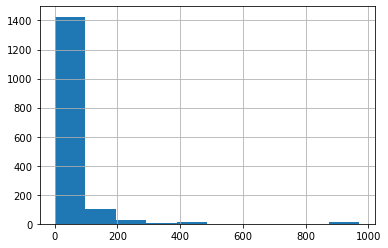

In [17]:
raw_df.groupby('feature_13')['market_price'].agg([
    'mean', 'count', 'median', 'std'
]).query('count > 500').sort_values(by='count', ascending=False)[
    'median'].hist()

<AxesSubplot:ylabel='Density'>

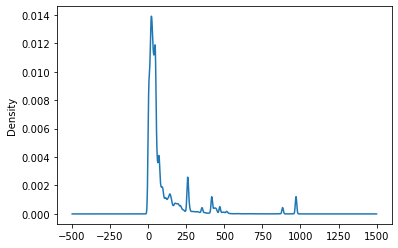

In [18]:
raw_df['market_price'].plot(kind='kde')

In [19]:
top10 = raw_df['feature_13'].value_counts()[:10].index.values

<AxesSubplot:ylabel='Density'>

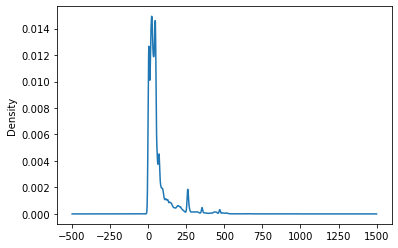

In [20]:
raw_df[['feature_13', 'market_price']].query('feature_13 == 1410710')['market_price'].plot(kind='kde')

In [4]:
from scipy.stats import gaussian_kde

In [5]:
prices = raw_df[['feature_13', 'market_price']].query('feature_13 == 1410710')['market_price']
kde = gaussian_kde(prices)

In [6]:
x = np.linspace(0, 1000, 1000)
actual_pdf = kde.pdf(x)
actual_cdf = np.cumsum(actual_pdf)

In [7]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import scipy.stats

In [8]:
def gen_dist(mean, median):
    mu = np.log(median)
    sigma = np.sqrt(2*(np.log(mean) - mu))
    print(f'mu: {mu}, sigma: {sigma}')
    return scipy.stats.lognorm(sigma, 0, median)

In [9]:
approximated_dist = gen_dist(np.mean(prices), np.median(prices))

mu: 3.6375861597263857, sigma: 1.0165213781262663


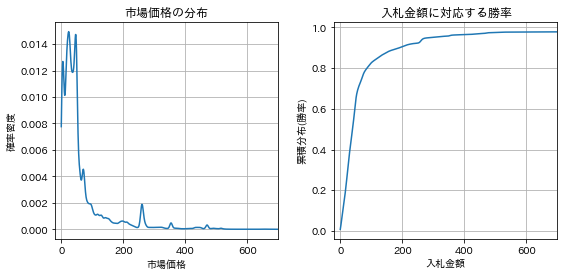

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
ax1 = axs[0]
ax1.plot(x, actual_pdf, label='実績')
ax1.set_xlabel('市場価格')
ax1.set_ylabel('確率密度')
ax1.set_xlim(-20, 700)
ax1.grid(True)
ax1.set_title('市場価格の分布')
ax2 = axs[1]
ax2.plot(x, actual_cdf, label='実績')
ax2.set_xlabel('入札金額')
ax2.set_ylabel('累積分布(勝率)')
ax2.set_title('入札金額に対応する勝率')
ax2.grid(True)
ax2.set_xlim(-20, 700)
plt.subplots_adjust(wspace=0.25)
fig.savefig("./market_price_1.png", format='png', facecolor='white', transparent=False, dpi=300)

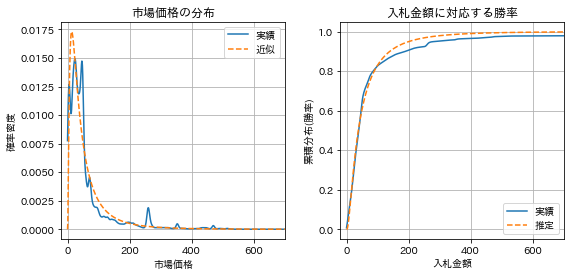

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
ax1 = axs[0]
ax1.plot(x, actual_pdf, label='実績')
ax1.plot(x, approximated_dist.pdf(x), linestyle='dashed', label='近似')
ax1.legend(loc='best')
ax1.set_xlabel('市場価格')
ax1.set_ylabel('確率密度')
ax1.set_xlim(-20, 700)
ax1.grid(True)
ax1.set_title('市場価格の分布')
ax2 = axs[1]
ax2.plot(x, actual_cdf, label='実績')
ax2.plot(x, approximated_dist.cdf(x), linestyle='dashed', label='推定')
ax2.legend(loc='best')
ax2.set_xlabel('入札金額')
ax2.set_ylabel('累積分布(勝率)')
ax2.set_title('入札金額に対応する勝率')
ax2.grid(True)
ax2.set_xlim(-20, 700)
plt.subplots_adjust(wspace=0.25)
fig.savefig("./market_price_actual.png", format='png', facecolor='white', transparent=False, dpi=300)

In [12]:
print(np.mean(prices))
print(np.median(prices))

63.7037872841057
38.0


In [13]:
v = (400 - x)

In [14]:
win_rate = approximated_dist.cdf(x)

In [15]:
ax2.set_hlines?


Object `ax2.set_hlines` not found.


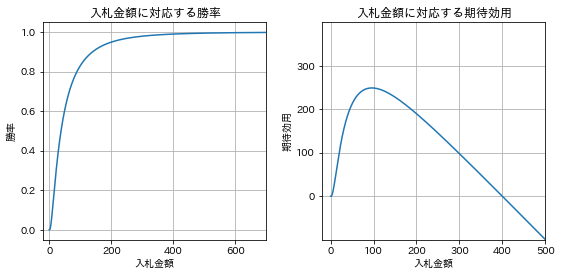

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
ax1 = axs[0]
ax1.plot(x, approximated_dist.cdf(x))
ax1.set_xlabel('入札金額')
ax1.set_title('入札金額に対応する勝率')
ax2.set_xticks([0, 100, 200, 300])
ax1.grid(True)
ax1.set_ylabel('勝率')
ax1.set_xlim(-20, 700)
ax2 = axs[1]
ax2.plot(x, (400 - x) * approximated_dist.cdf(x))
ax2.set_xlabel('入札金額')
ax2.set_ylabel('期待効用')
ax2.set_title('入札金額に対応する期待効用')
ax2.set_yticks([0, 100, 200, 300])
ax2.grid(True)
ax2.set_xlim(-20, 500)
ax2.set_ylim(-100, 400)
plt.subplots_adjust(wspace=0.25)
fig.savefig("./expected_utility.png", format='png', facecolor='white', transparent=False, dpi=300)

(-100.0, 300.0)

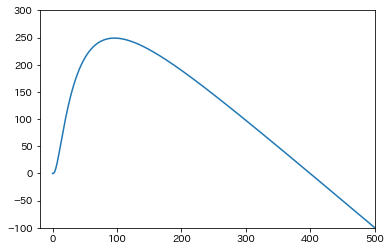

In [17]:
plt.plot(x, v*win_rate)
plt.xlim(-20, 500)
plt.ylim(-100, 300)
